*Import library's*

In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob as tb
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
import os, re, nltk, string
from bs4 import BeautifulSoup
from collections import OrderedDict
from operator import itemgetter

*Twitter authentication*

In [2]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

In [3]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.search(screen_name, count=200, max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [4]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1097960385666260992,2019-02-19 20:45:29,b'@falanext Muito caro. Mesmo pre\xc3\xa7o do ...
1,1097960007805648897,2019-02-19 20:43:59,"b'@falanext Linduxos, please, help. J\xc3\xa1 ..."
2,1097959129765810178,2019-02-19 20:40:30,b'@falanext Eu sou uma campanha espec\xc3\xadf...
3,1097953114584420352,2019-02-19 20:16:36,b'RT @bwdgalriri: o @falanext \xc3\xa9 um LIXO...
4,1097952867451842560,2019-02-19 20:15:37,b'o @falanext \xc3\xa9 um LIXO\nnunca fa\xc3\x...
5,1097951215541985280,2019-02-19 20:09:03,b'Bem vindo @falanext ... :)\n\nPS.: Prometo q...
6,1097950968837259264,2019-02-19 20:08:04,b'@duhsouza @atilalacerda @Bancointer @falanex...
7,1097941304120619008,2019-02-19 19:29:40,b'@atilalacerda @_GloXavier @Bancointer nao va...
8,1097940852398272512,2019-02-19 19:27:52,"b'@falanext, pior do q ser rejeitado \xc3\xa9 ..."
9,1097939000441139200,2019-02-19 19:20:31,b'O atendimento do @falanext \xc3\xa9 horr\xc...


*Data Cleaning*

In [5]:
def cleanTweets(tweetsDF):
    table = str.maketrans(dict.fromkeys(string.punctuation.replace('@','')))
    # essa regex significa:
    # tudo que conter @ OU http OU terminador de linha seguido de uma palavra OU um espaco OU qualquer outro terminador
    # de linha.
    rePattern1 = '(@|http|\\n)(\w+|\s|\S)'
    formattedTweets = []
    for line in tweetsDF['text']:
        formattedStr = line.decode('utf-8').lower()
        formattedStr = formattedStr.translate(table)
        formattedStr = re.sub(rePattern1, "", formattedStr)  
        formattedTweets.append(formattedStr)
    return formattedTweets

formattedTweets = cleanTweets(df)
data = pd.DataFrame(formattedTweets, columns=['text'])
data

,text
0,muito caro mesmo preço do bradesco no pacote ...
1,linduxos please help já falei pelo inbox pelo...
2,eu sou uma campanha específica em pessoa 😌
3,rt o é um lixo façam conta nisso sério eu qu...
4,o é um lixo façam conta nisso sério eu quero ...
5,bem vindo ps prometo que não é traição ❣️
6,aaaaaaaaaaakkkkkkkkkkkkkkkkkkkkkkkkkkkkk e...
7,nao vai pro nao foi o pior banco q ja tive...
8,pior do q ser rejeitado é ficar esperando por...
9,o atendimento do é horrível


*Stopwords in portuguese*

In [6]:
stopwords = nltk.corpus.stopwords.words('portuguese')
# Inclusão de novas stopwords 
stopwords.append('tô')
stopwords.append('tá')
stopwords.append('pra')
stopwords.append('pro')
stopwords.append('é')
stopwords.append('aí')
stopwords.append('ser')
stopwords.append('pq')
stopwords.append('já')
stopwords.append('nao')
stopwords.append('rt')
stopwords.append('porque')
stopwords.append('vai')
stopwords.append('vou')
stopwords.append('faço')
stopwords.append('dm')
stopwords.append('q')
stopwords.append('faz')
stopwords.append('dá')
stopwords.append('assim')
stopwords.append('agora')
stopwords.append('nada')
stopwords.append('tbm')

*WordCloud*

Text(0.5,1,'Tweets WordCloud - atendimento')

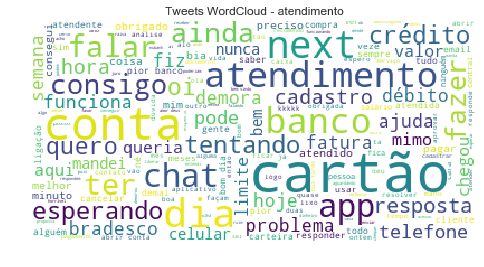

In [7]:
text = " ".join(tweet for tweet in data['text'])
plt.style.use('seaborn')
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Tweets WordCloud - atendimento')

*Basic statistics about the data*

In [8]:
def word_count(str):
    counts = OrderedDict()
    words = str.split()
    for word in words:
        if word not in stopwords:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts

print("There are {} words in the combination of all tweets.".format(len(text)))

counts = sorted(word_count(text).items(), key = itemgetter(1), reverse = True)
display(counts[:10])

There are 55713 words in the combination of all tweets.


[('cartão', 109),
 ('conta', 94),
 ('next', 67),
 ('banco', 51),
 ('atendimento', 49),
 ('chat', 41),
 ('app', 35),
 ('dia', 35),
 ('falar', 30),
 ('esperando', 30)]

*Transform occurrences in a dataframe*

In [9]:
wordcount = pd.DataFrame(counts, columns=['word', 'counts'])
top10 = wordcount[:10]
top10

,word,counts
0,cartão,109
1,conta,94
2,next,67
3,banco,51
4,atendimento,49
5,chat,41
6,app,35
7,dia,35
8,falar,30
9,esperando,30


*Top 10 most used words*

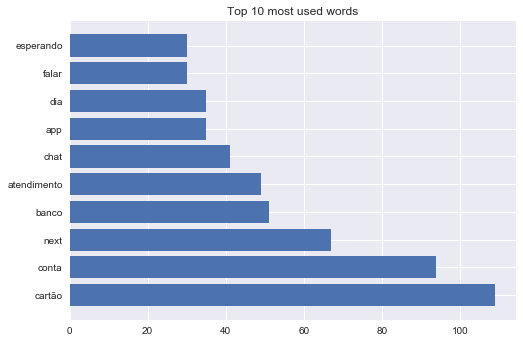

In [10]:
# Dataset
plt.style.use('seaborn')
height = top10.counts
bars = top10.word
y_pos = np.arange(len(bars))
fig = plt.figure()
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words')
 
# Show graphic
plt.show()

In [11]:
# Save graph into a file
fig.savefig('most_used_words.png', bbox_inches='tight', pad_inches=0.1)

*ReLi Lexicon - portuguese sentimental analysis*

In [12]:
base_path = '/Users/gayr/documents/gabriela/mba/tcc/ReLi-Lex'
allData = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r', encoding = 'latin-1') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            allData.append((w[1:-1], t))
allDataDF = pd.DataFrame(allData, columns=['word', 'sentiment'])

*Validate the model and avoid overfit*

Functions

In [13]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# A random forest classifier
from sklearn.ensemble import RandomForestClassifier
# A naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
# A boosting classifier
from sklearn.ensemble import AdaBoostClassifier
# Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
# Accuracy classification score
from sklearn.metrics import accuracy_score
# This classifier is useful as a simple baseline to compare with other (real) classifiers
from sklearn.dummy import DummyClassifier

C:\Users\GAYR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Original Variables

In [14]:
X_original = allDataDF.word
Y_original = allDataDF.sentiment

O sklearn precisa que as variáveis independentes sejam contínuas - por esse motivo precisaremos transformar palavras em números

In [15]:
le_x = LabelEncoder()
X_labelEncoded = le_x.fit_transform(X_original)
le_y = LabelEncoder()
Y_labelEncoded = le_y.fit_transform(Y_original)

In [16]:
zippedEncoded = list(zip(X_labelEncoded, Y_labelEncoded))
dfEncoded = pd.DataFrame(zippedEncoded, columns = ['word', 'sentiment'])

Cross Validation - Divisão da amostra entre treino e teste - scikitlearn

In [17]:
X_labelEncodedDF = dfEncoded.word
Y_labelEncodedDF = dfEncoded.sentiment
X_train, X_test, y_train, y_test = train_test_split(X_labelEncodedDF, Y_labelEncodedDF, test_size=0.30, random_state = 13)

*Classification Models*

Random Forest Classifier

In [18]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = rf.predict(X_test.values.reshape(-1, 1))

Naive Bayes Classifier

In [19]:
nb = MultinomialNB()
nb.fit(X_train.values.reshape(-1, 1), y_train)
y_nb_pred = nb.predict(X_test.values.reshape(-1, 1))

Boosting Classifier

In [20]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train.values.reshape(-1, 1), y_train)
y_clf_pred = clf.predict(X_test.values.reshape(-1, 1))

Dummy Model

In [21]:
dm = DummyClassifier()
dm.fit(X_train.values.reshape(-1, 1), y_train)
y_dummy_pred = dm.predict(X_test.values.reshape(-1, 1))

*Model´s Accuracy*

In [22]:
print('Accuracy random forest on test dataset: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
print('Accuracy naive bayes on test dataset: {}'.format(round(accuracy_score(y_test, y_nb_pred), 2)))
print('Accuracy boosting on test dataset: {}'.format(round(accuracy_score(y_test, y_clf_pred), 2)))
print('Accuracy dummy model on test dataset: {}'.format(round(accuracy_score(y_test, y_dummy_pred), 2)))

Accuracy random forest on test dataset: 0.7
Accuracy naive bayes on test dataset: 0.61
Accuracy boosting on test dataset: 0.66
Accuracy dummy model on test dataset: 0.54


A seguir, iremos utilizar o algoritmo para classificação Random Forest para a análise de sentimentos, devido ao melhor nível de acurácia apresentado.

In [23]:
# tweetsDataLabelEncoder = LabelEncoder()
tweet_text = data.text
tweetsEncoded = le_x.fit_transform(tweet_text)
y_pred_total = rf.predict(tweetsEncoded.reshape(-1, 1))
y_pred_total_decoded = le_y.inverse_transform(y_pred_total)
data['sentiment'] = y_pred_total_decoded
display(data[:10])

C:\Users\GAYR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,text,sentiment
0,muito caro mesmo preço do bradesco no pacote ...,pos
1,linduxos please help já falei pelo inbox pelo...,neg
2,eu sou uma campanha específica em pessoa 😌,pos
3,rt o é um lixo façam conta nisso sério eu qu...,neg
4,o é um lixo façam conta nisso sério eu quero ...,neg
5,bem vindo ps prometo que não é traição ❣️,neg
6,aaaaaaaaaaakkkkkkkkkkkkkkkkkkkkkkkkkkkkk e...,pos
7,nao vai pro nao foi o pior banco q ja tive...,neg
8,pior do q ser rejeitado é ficar esperando por...,neg
9,o atendimento do é horrível,neg


*Counting positives and negatives*

In [24]:
df = data.groupby('sentiment').count()
df

,text
sentiment,
neg,419
pos,393


*Sentimental Analysis Graph based on Naive-Bayes Classification*

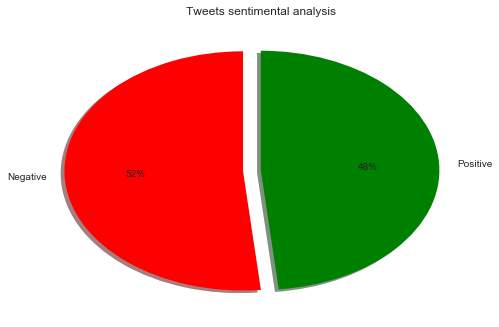

In [25]:
plt.style.use('seaborn')
pie_pos = df.loc['pos']
pie_neg = df.loc['neg']
fig = plt.figure()

slices = [pie_neg, pie_pos]
tweets = ['Negative', 'Positive']
columns = ['Red', 'Green']

plt.title('Tweets sentimental analysis')
 
plt.pie(slices, labels = tweets, colors = columns, startangle = 90, shadow = True, explode = (0.1, 0), autopct='%1.0f%%')

plt.show()

In [26]:
# Save graph into a file
fig.savefig("tweets_sentimental_analysis.png")

*Positive WordCloud*

In [27]:
# filtrar dataframe com tweets positivos
data_pos_filtered = data[data['sentiment'] == 'pos']
data_pos_filtered

,text,sentiment
0,muito caro mesmo preço do bradesco no pacote ...,pos
2,eu sou uma campanha específica em pessoa 😌,pos
6,aaaaaaaaaaakkkkkkkkkkkkkkkkkkkkkkkkkkkkk e...,pos
16,eu não consegui depositar dinheiro na sextafe...,pos
21,tira uma dúvida quanto tempo demora a análise...,pos
22,deveria liberar a opção de pagar o cartão por...,pos
27,oi tudo bem com você chame por dm pedro vamo...,pos
29,faz 20 dias que eu pedi para cancelar meu car...,pos
30,aceita o cara menino é bom kkkk,pos
31,ngm me aceita,pos


*Save positive tweets in a csv file*

In [28]:
data_pos_filtered.to_csv("positive_tweets.csv", index = False, sep=';', encoding='utf-16')

*Like mask*

In [29]:
from PIL import Image
like_mask = np.array(Image.open("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/like.png"))
like_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

*Transform the mask*

In [30]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [31]:
# Transform your mask into a new one that will work with the function:
transformed_like_mask = np.ndarray((like_mask.shape[0],like_mask.shape[1]), np.int32)

for i in range(len(like_mask)):
    transformed_like_mask[i] = list(map(transform_format, like_mask[i]))

In [32]:
# Check the expected result of your mask
transformed_like_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [33]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_like_mask,
               stopwords=stopwords, contour_width=1, contour_color='white')

Text(0.5,1,'Positive Tweets WordCloud')

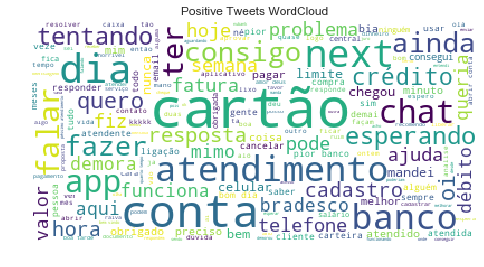

In [34]:
# WordCloud
plt.style.use('seaborn')
data_pos_filtered = " ".join(tweet for tweet in data_pos_filtered['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user_pos.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positive Tweets WordCloud')

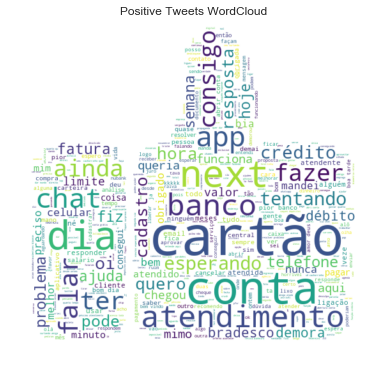

In [35]:
# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/likecloud.png")

# show
plt.figure(figsize=[15,6])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets WordCloud')
plt.show()

*Top 10 most used words in positive tweets*

In [36]:
count_pos = sorted(word_count(data_pos_filtered).items(), key = itemgetter(1), reverse = True)
wordcount_pos = pd.DataFrame(count_pos, columns=['word', 'counts'])
top10_pos = wordcount_pos[:10]
top10_pos

,word,counts
0,cartão,52
1,conta,48
2,next,31
3,banco,27
4,atendimento,21
5,app,17
6,dia,16
7,esperando,16
8,fazer,16
9,chat,16


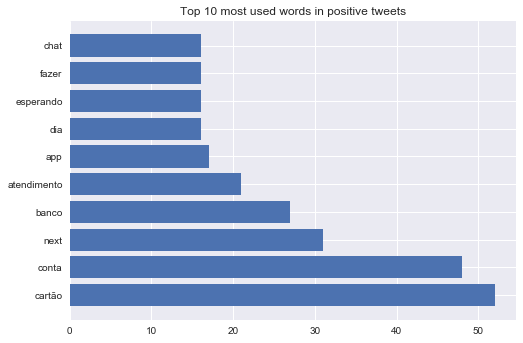

In [37]:
# Dataset
plt.style.use('seaborn')
height = top10_pos.counts
bars = top10_pos.word
y_pos = np.arange(len(bars))
fig = plt.figure()
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words in positive tweets')
 
# Show graphic
plt.show()

In [38]:
# Save graph into a file
fig.savefig("most_used_positive_words.png")

*Negative WordCloud*

In [39]:
# filtrar dataframe com tweets positivos
data_neg_filtered = data[data['sentiment'] == 'neg']
data_neg_filtered

,text,sentiment
1,linduxos please help já falei pelo inbox pelo...,neg
3,rt o é um lixo façam conta nisso sério eu qu...,neg
4,o é um lixo façam conta nisso sério eu quero ...,neg
5,bem vindo ps prometo que não é traição ❣️,neg
7,nao vai pro nao foi o pior banco q ja tive...,neg
8,pior do q ser rejeitado é ficar esperando por...,neg
9,o atendimento do é horrível,neg
10,mandei minha proposta pro só para pagar ingre...,neg
11,péssimo atendimento do pelo telefone sempre a...,neg
12,oi chega ai rapidinho prometo ser a última do...,neg


*Save negative tweets in a csv file*

In [40]:
data_neg_filtered.to_csv("negative_tweets.csv", index = False, sep=';', encoding='utf-16')

*Dislike mask*

In [41]:
from PIL import Image
dislike_mask = np.array(Image.open("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/dislike.png"))
dislike_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

*Transform the mask*

In [42]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

In [43]:
# Transform your mask into a new one that will work with the function:
transformed_dislike_mask = np.ndarray((dislike_mask.shape[0],dislike_mask.shape[1]), np.int32)

for i in range(len(dislike_mask)):
    transformed_dislike_mask[i] = list(map(transform_format, dislike_mask[i]))

In [44]:
# Check the expected result of your mask
transformed_dislike_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [45]:
# Create a word cloud image
wc_dislike = WordCloud(background_color="white", max_words=1000, mask=transformed_dislike_mask,
               stopwords=stopwords, contour_width=1, contour_color='white')

Text(0.5,1,'Negative Tweets WordCloud')

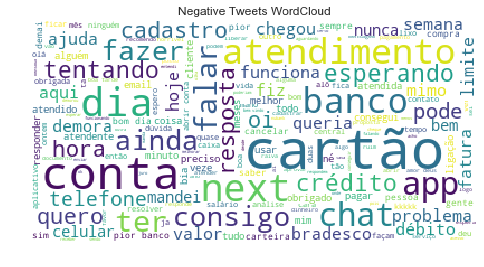

In [46]:
# WordCloud
plt.style.use('seaborn')
data_neg_filtered = " ".join(tweet for tweet in data_neg_filtered['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user_neg.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negative Tweets WordCloud')

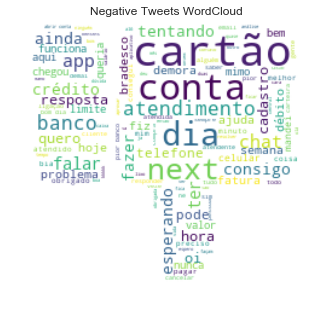

In [47]:
# Generate a wordcloud
wc_dislike.generate(text)

# store to file
wc_dislike.to_file("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/dislikecloud.png")

# show
plt.figure(figsize=[12,5])
plt.imshow(wc_dislike, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets WordCloud')
plt.show()

*Top 10 most used words in negative tweets*

In [48]:
count_neg = sorted(word_count(data_neg_filtered).items(), key = itemgetter(1), reverse = True)
wordcount_neg = pd.DataFrame(count_neg, columns=['word', 'counts'])
top10_neg = wordcount_neg[:10]
top10_neg

,word,counts
0,cartão,57
1,conta,46
2,next,36
3,atendimento,28
4,chat,25
5,banco,24
6,dia,19
7,app,18
8,tentando,18
9,ajuda,17


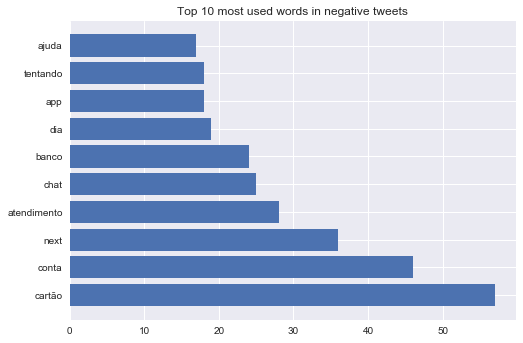

In [49]:
# Dataset
plt.style.use('seaborn')
height = top10_neg.counts
bars = top10_neg.word
y_pos = np.arange(len(bars))
fig = plt.figure()
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words in negative tweets')
 
# Show graphic
plt.show()

In [50]:
# Save into a file
fig.savefig("most_used_negative_words.png")